In [83]:
from PINNs import PINN, Geometry, Physics, NetworkTrainer, Visualization, ProblemDomain
import torch
import matplotlib.pyplot as plt

In [84]:
circle = Geometry.circle(0.5,0.5,0.2)
area_big = Geometry.rectangle([0,4],[0,1])

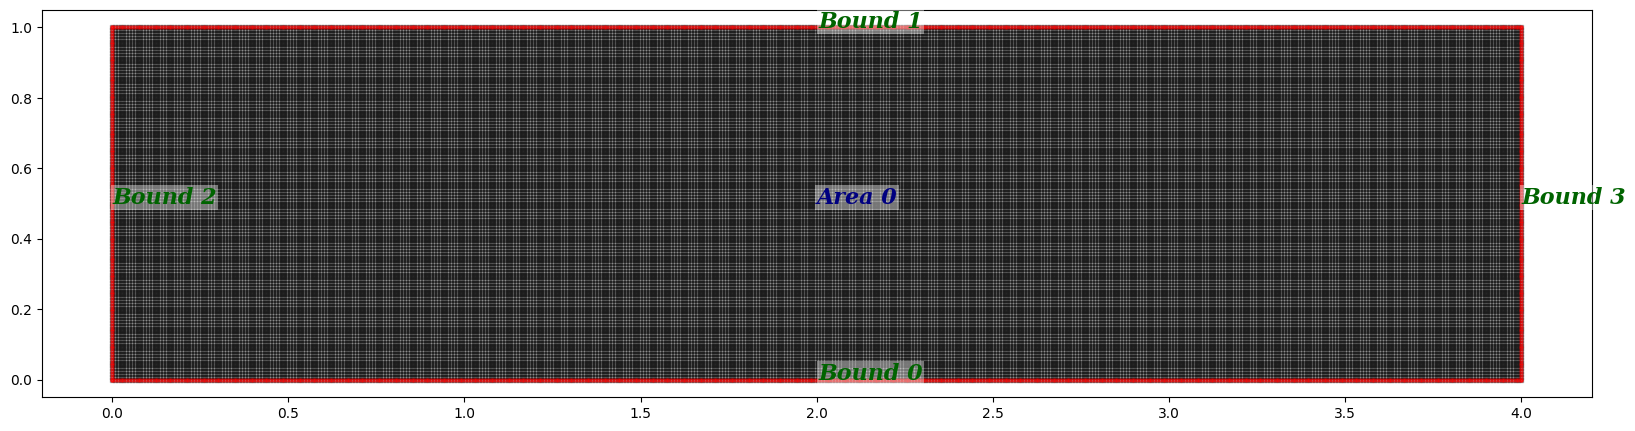

In [85]:
domain = ProblemDomain(area_big.bound_list,[area_big])
domain.show_setup()

## Define Physics

In [86]:
domain.bound_list[0].define_bc({'u':0,'v':0})
domain.bound_list[1].define_bc({'u':0,'v':0})
domain.bound_list[2].define_bc({'u': 0.1, 'v': 0.0})
domain.bound_list[3].define_bc({'p':0})

In [87]:
domain.area_list[0].define_pde(Physics.NVS())

random sampling


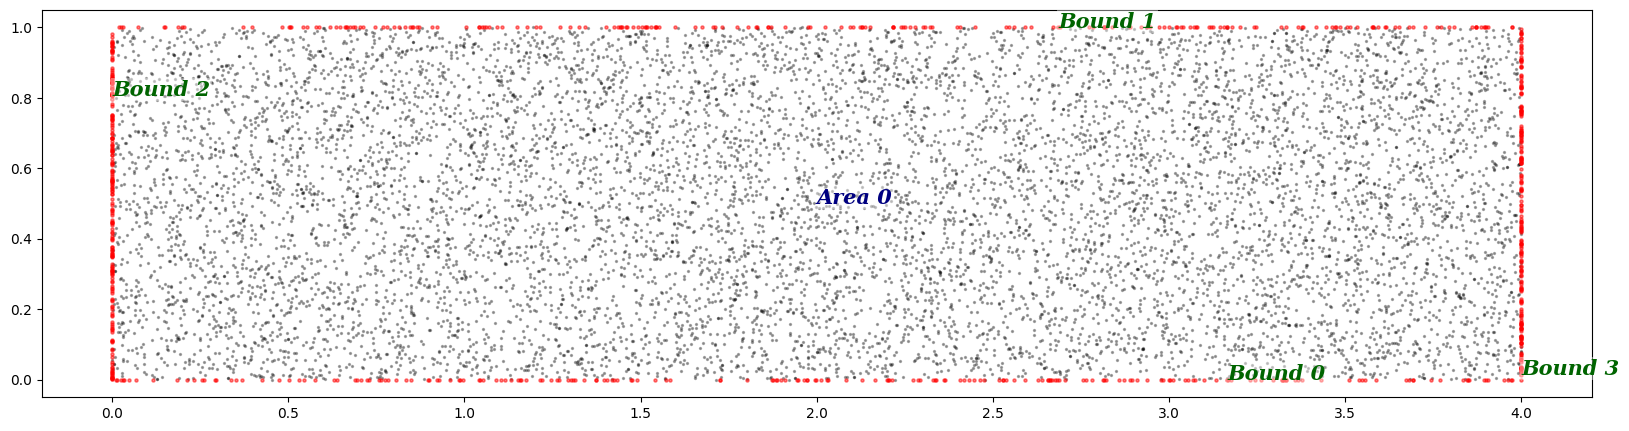

In [88]:
domain.sampling_random_r([200, 200, 200, 200, 200, 200], [10000])
domain.show_coordinates()

In [89]:
model0 = PINN(width=32, length=8)

In [90]:
# Define the loss calculation function
loss_fn = torch.nn.MSELoss()

n = 0
def calc_loss(model):
    # global n
    # # Re-sample the collocation points at each step
    # if n % 200 == 0:
    #     domain.sampling_random_r([200, 200, 200, 200, 200, 200], [100, 1000])
    # n += 1
    
    # BC Loss
    bc_loss = 0
    for i, bc in enumerate(domain.bound_list):
        bc_loss += bc.calc_loss(model, loss_fn)

    # PDE Loss
    pde_loss = 0
    for i, area in enumerate(domain.area_list):
        pde_loss += area.calc_loss(model, loss_fn)
    
    # Total Loss
    total_loss = bc_loss + pde_loss
    return {"bc_loss": bc_loss, "pde_loss": pde_loss, "total_loss": total_loss}

In [91]:
# Train the model
model1 = NetworkTrainer.train_adam(
    model=model0,
    calc_loss=calc_loss,
    learning_rate=0.001,
    epochs=2000,
    print_every=100
)

epoch 1, total_loss: 0.08856, bc_loss: 0.08856, pde_loss: 0.00000
epoch 101, total_loss: 0.00123, bc_loss: 0.00100, pde_loss: 0.00023
epoch 201, total_loss: 0.00107, bc_loss: 0.00092, pde_loss: 0.00015
epoch 301, total_loss: 0.00102, bc_loss: 0.00089, pde_loss: 0.00013
epoch 401, total_loss: 0.00098, bc_loss: 0.00086, pde_loss: 0.00012
epoch 501, total_loss: 0.00089, bc_loss: 0.00078, pde_loss: 0.00011
epoch 601, total_loss: 0.00067, bc_loss: 0.00058, pde_loss: 0.00009
epoch 701, total_loss: 0.00059, bc_loss: 0.00047, pde_loss: 0.00011


KeyboardInterrupt: 

In [ ]:
# Create visualization object
visual_model = Visualization(domain.area_list[0], model0)
visual_model.sampling_plot_points(400,100)
keyword = visual_model.process_model()
print(keyword) #printing keyword using for plotclor_select()

(['u', 'v', 'p', 'u_x', 'v_x', 'p_x', 'u_y', 'v_y', 'p_y', 'u_xx', 'v_xx', 'u_yy', 'v_yy', 'residual', 'velocity_magnitude'], ['total_loss', 'bc_loss', 'pde_loss'])


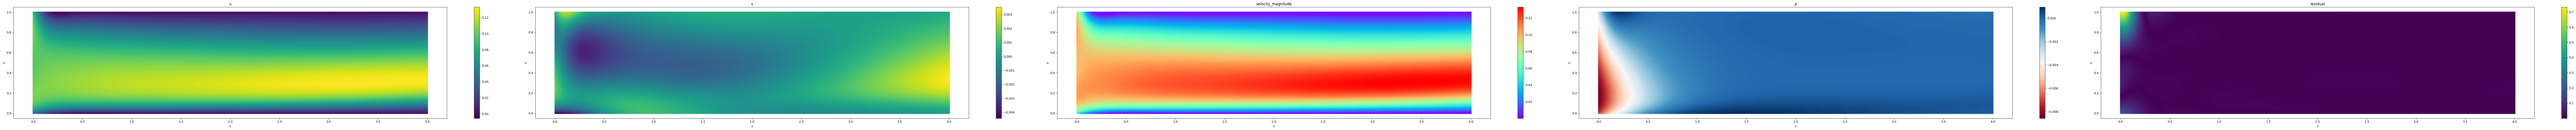

In [ ]:
cmap_dict = {
    'u':None,
    'v':None,
    'velocity_magnitude': 'rainbow',
    'p':'RdBu',
    'residual':None
}
colorplot_all = visual_model.plotcolor_select(cmap_dict, s=10)
colorplot_all.savefig('cylinder_flow_steady_all.png')